In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/train.csv')

df = df[df.price > 0]
df = df[df.lat<=1.47]
df = df[df.size_sqft>0]

df['price_per_sq_ft'] = df['price']/df['size_sqft']

df = df[['lat','lng', 'price_per_sq_ft']]

df = df.groupby(['lat', 'lng']).mean().reset_index()
df['price_per_sq_ft'] = df['price_per_sq_ft'].astype(np.int32)

In [2]:
df.to_csv('../data/lat_long_price.csv', encoding='utf-8', index=False)

In [3]:
X = df[['lat', 'lng']]
y = df[['price_per_sq_ft']]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


poly_reg = PolynomialFeatures(9)
X_poly = poly_reg.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)


In [5]:

pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train) 


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [6]:
pipe.score(X_test, y_test)

-11096.15819580284

In [7]:
X.shape

(4303, 2)

/var/folders/9p/4f_fcqf57lx9ck4gqb88rkm80000gn/T/ipykernel_45801/3228080057.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


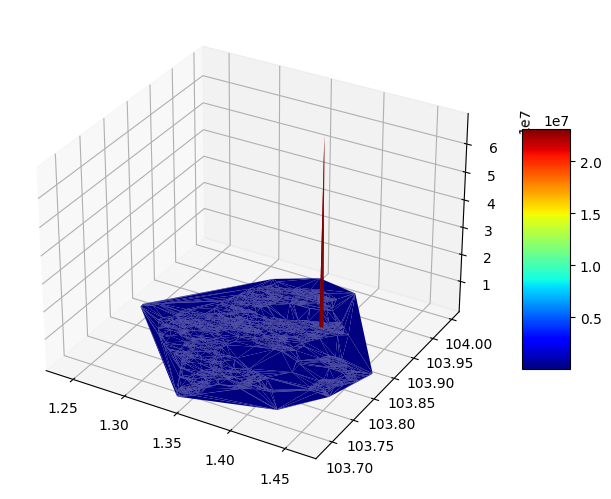

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sys import argv
from sklearn.preprocessing import scale



x,y,z = np.loadtxt('../data/lat_long_price.csv', unpack=True, skiprows=1, delimiter=',')
# x=scale(x, axis=0, with_mean=True, with_std=True, copy=True )
# y=scale(y, axis=0, with_mean=True, with_std=True, copy=True )
# z=scale(z, axis=0, with_mean=True, with_std=True, copy=True )

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('teste.pdf')
plt.show()

In [9]:
import geopandas as gpd
import shapely

In [10]:
sg_map='../../sg_map/SGP_adm0.shp'

In [11]:
gdf = gpd.read_file(sg_map)

In [12]:
gdf.explore()

In [13]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
geom_list = [shapely.geometry.Point(lon,lat) for lon,lat in zip(df["lng"] ,df["lat"])]
gdf_props = gpd.GeoDataFrame(df, geometry=geom_list, crs="EPSG:4326")                                                                                    

In [15]:
gdf_props.head()

,lat,lng,price_per_sq_ft,geometry
0,1.239621,103.837713,2299,POINT (103.83771 1.23962)
1,1.240022,103.830929,3420,POINT (103.83093 1.24002)
2,1.241109,103.836161,2636,POINT (103.83616 1.24111)
3,1.241143,103.839619,2281,POINT (103.83962 1.24114)
4,1.241832,103.837759,2048,POINT (103.83776 1.24183)


In [16]:
gdf_props.explore()

In [17]:
s = gdf_props.geometry


In [18]:
proj = s.to_crs(epsg=3035)


In [19]:
circ = proj.buffer(500)